<a href="https://colab.research.google.com/github/BountyHunter1999/Machine-Learning-Zoom-Camp/blob/main/Homeworks/Homework%20%236.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-10-17 14:47:27--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.09s   

2021-10-17 14:47:28 (77.9 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [3]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [4]:
df.head().T

,0,1,2,3,4
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
latitude,40.6475,40.7536,40.809,40.6851,40.7985
longitude,-73.9724,-73.9838,-73.9419,-73.9598,-73.944
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9
reviews_per_month,0.21,0.38,0,4.64,0.1
calculated_host_listings_count,6,2,1,1,1
availability_365,365,355,365,194,0


* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [5]:
df.price = np.log1p(df.price)

In [6]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [7]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [8]:
y_train = df_train['price'] 
y_val = df_val['price'] 
y_test = df_test['price'] 

In [9]:
del df_train['price']
del df_val['price']
del df_test['price']

In [10]:
df_train.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Queens,40.76434,-73.92132,Entire home/apt,4,30,0.32,1,363
1,Brooklyn,40.73442,-73.95854,Private room,5,2,0.16,1,0
2,Brooklyn,40.66359,-73.99487,Entire home/apt,1,33,2.75,5,113
3,Brooklyn,40.63766,-74.02626,Private room,3,1,0.12,2,362
4,Brooklyn,40.65118,-74.00842,Private room,2,0,0.00,2,365


Now, use `DictVectorizer` to turn train and validation into matrices:

In [11]:
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [13]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Which feature is used for splitting the data?

* `room_type` : **THIS**
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

In [40]:
dv.get_feature_names(), len(dv.get_feature_names())

(['availability_365',
  'calculated_host_listings_count',
  'latitude',
  'longitude',
  'minimum_nights',
  'neighbourhood_group=Bronx',
  'neighbourhood_group=Brooklyn',
  'neighbourhood_group=Manhattan',
  'neighbourhood_group=Queens',
  'neighbourhood_group=Staten Island',
  'number_of_reviews',
  'reviews_per_month',
  'room_type=Entire home/apt',
  'room_type=Private room',
  'room_type=Shared room'],
 15)

In [17]:
from sklearn.tree import export_text

In [18]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
np.sqrt(100)

10.0

In [22]:
rf = RandomForestRegressor(n_estimators=10,
                          n_jobs=-1,
                          random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred)) # y_true, y_pred
round(rmse,3)

0.461

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459 THIS
* 0.659

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [23]:
estimators = np.arange(10,210, step=10)
estimators

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [24]:
scores = []
for n in estimators:
  rf = RandomForestRegressor(n_estimators=n,
                            n_jobs=-1,
                            random_state=1)
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_val)
  rmse = np.sqrt(mean_squared_error(y_val, y_pred)) # y_true, y_pred
  print(f"for n_estimator={n} rmse={round(rmse,5)}")
  scores.append((n, rmse))

for n_estimator=10 rmse=0.46089
for n_estimator=20 rmse=0.44744
for n_estimator=30 rmse=0.4444
for n_estimator=40 rmse=0.44282
for n_estimator=50 rmse=0.44177
for n_estimator=60 rmse=0.44125
for n_estimator=70 rmse=0.44064
for n_estimator=80 rmse=0.44074
for n_estimator=90 rmse=0.44027
for n_estimator=100 rmse=0.43976
for n_estimator=110 rmse=0.43931
for n_estimator=120 rmse=0.43913
for n_estimator=130 rmse=0.43928
for n_estimator=140 rmse=0.43915
for n_estimator=150 rmse=0.43903
for n_estimator=160 rmse=0.43884
for n_estimator=170 rmse=0.43875
for n_estimator=180 rmse=0.43885
for n_estimator=190 rmse=0.43879
for n_estimator=200 rmse=0.43879


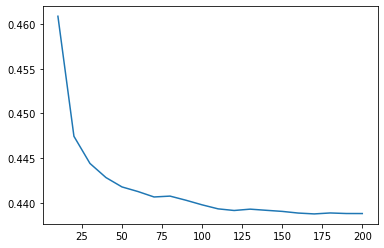

In [25]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)

After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120 : THIS

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [26]:
scores = []
for d in [10, 15, 20, 25]:
  print("##########################")
  print(f"FOR DEPTH {d}")
  for n in estimators:
    rf = RandomForestRegressor(n_estimators=n,
                              n_jobs=-1,
                              max_depth=d,
                              # random_state=1)
                              random_state=3) # changing random state
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred)) # y_true, y_pred
    scores.append((d, n, round(rmse,4)))

  print("##########################")

##########################
FOR DEPTH 10
##########################
##########################
FOR DEPTH 15
##########################
##########################
FOR DEPTH 20
##########################
##########################
FOR DEPTH 25
##########################


In [27]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

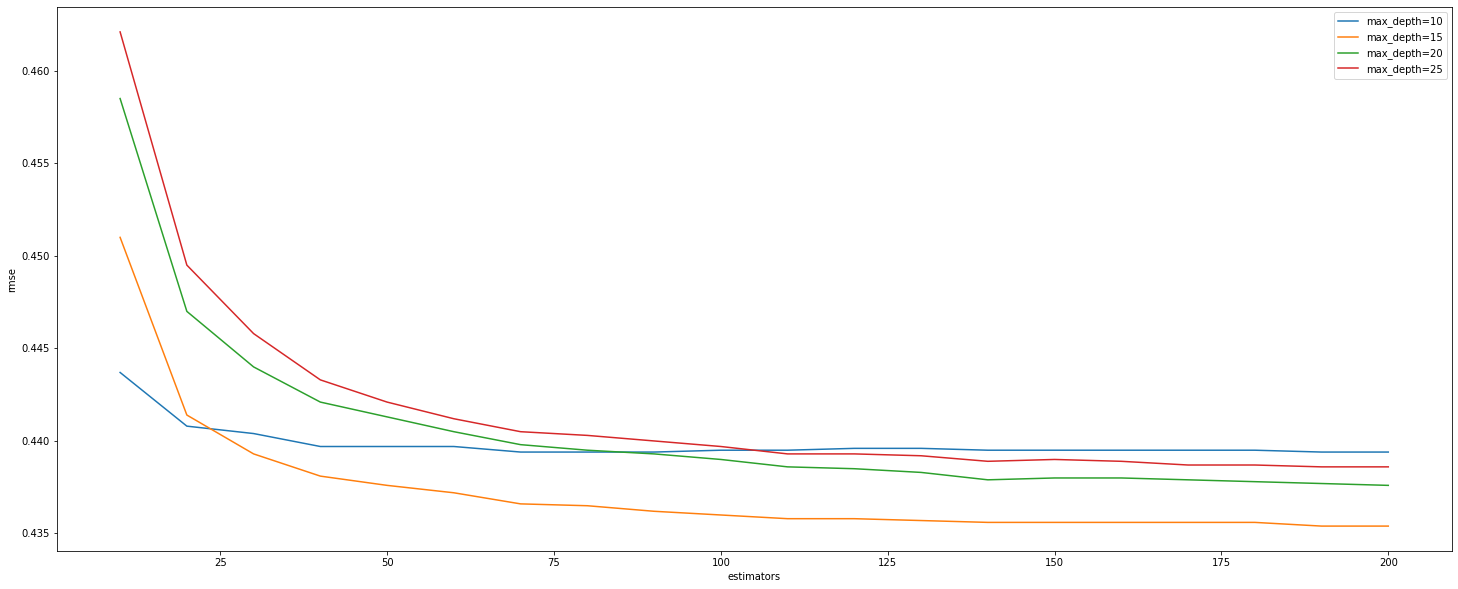

In [28]:
plt.figure(figsize=(25,10))
plt.xlabel('estimators')
plt.ylabel('rmse')
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d) # x,y

plt.legend()

What's the best `max_depth`:

* 10
* 15: **THIS**
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?
==> NOP

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [29]:
rf = RandomForestRegressor(n_estimators=10,
                          n_jobs=-1,
                          max_depth=20,
                          random_state=1,
                           )

In [30]:
X_train.shape, y_train.shape

((29337, 15), (29337,))

In [31]:
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

In [32]:
importances = rf.feature_importances_.round(3)
importances, len(importances)

(array([0.077, 0.031, 0.152, 0.153, 0.054, 0.   , 0.001, 0.034, 0.001,
        0.   , 0.044, 0.052, 0.392, 0.005, 0.005]), 15)

In [33]:
df_train.columns, len(df_train.columns)

(Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type',
        'minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365'],
       dtype='object'), 9)

In [34]:
rf?

In [35]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [36]:
X_train.shape, y_train.shape

((29337, 15), (29337,))

In [39]:
rf.n_features_

15

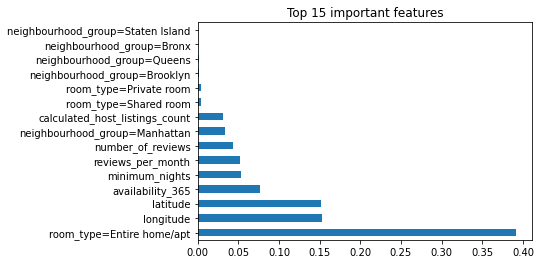

In [43]:
feat_importances = pd.Series(rf.feature_importances_, index=dv.get_feature_names())
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	 THIS
* `longitude`
* `latitude`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [44]:
!pip install xgboost

In [45]:
import xgboost as xgb

In [47]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [49]:
watch_list = [(dtrain, 'train'), (dval, 'val')]

In [48]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [52]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [53]:
y_pred = model.predict(dval)

In [54]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

0.43406553396155145

Now change `eta` first to `0.1` and then to `0.01`

In [68]:
scores= []
for eta in [0.1, 0.3, 0.01]:
  xgb_params = {
      'eta': eta, 
      'max_depth': 6,
      'min_child_weight': 1,

      'objective': 'reg:squarederror',
      'nthread': 8,

      'seed': 1,
      'verbosity': 1,
  }
    
  model = xgb.train(xgb_params, dtrain, num_boost_round=100)
  y_pred = model.predict(dval)
  rmse = np.sqrt(mean_squared_error(y_val, y_pred))
  
  scores.append((eta,rmse))
  print(f"for eta={eta} rmse= {rmse}")


for eta=0.1 rmse= 0.43287300538946744
for eta=0.3 rmse= 0.43406553396155145
for eta=0.01 rmse= 1.6304937543510767


What's the best eta?

* 0.3
* 0.1 **THIS**
* 0.01

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

